IRIS DATASET

In [2]:
import pandas as pd
df=pd.read_csv("/content/iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [4]:
df['species'] = df['species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

X = df.drop('species', axis=1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_default = RandomForestClassifier(n_estimators=10, random_state=42)
rf_default.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [5]:
y_pred_default = rf_default.predict(X_test)
accuracy_default = accuracy_score(y_test, y_pred_default)

print(f"Accuracy with default n_estimators (10): {accuracy_default:.4f}")

Accuracy with default n_estimators (10): 1.0000


In [6]:
best_accuracy = 0
best_n_estimators = 10

# Try different values for n_estimators
for n in range(10, 201, 10):
    rf_tuned = RandomForestClassifier(n_estimators=n, random_state=42)
    rf_tuned.fit(X_train, y_train)

    # Predict and calculate accuracy
    y_pred_tuned = rf_tuned.predict(X_test)
    accuracy_tuned = accuracy_score(y_test, y_pred_tuned)

    if accuracy_tuned > best_accuracy:
        best_accuracy = accuracy_tuned
        best_n_estimators = n

print(f"Best accuracy: {best_accuracy:.4f} with n_estimators = {best_n_estimators}")

Best accuracy: 1.0000 with n_estimators = 10


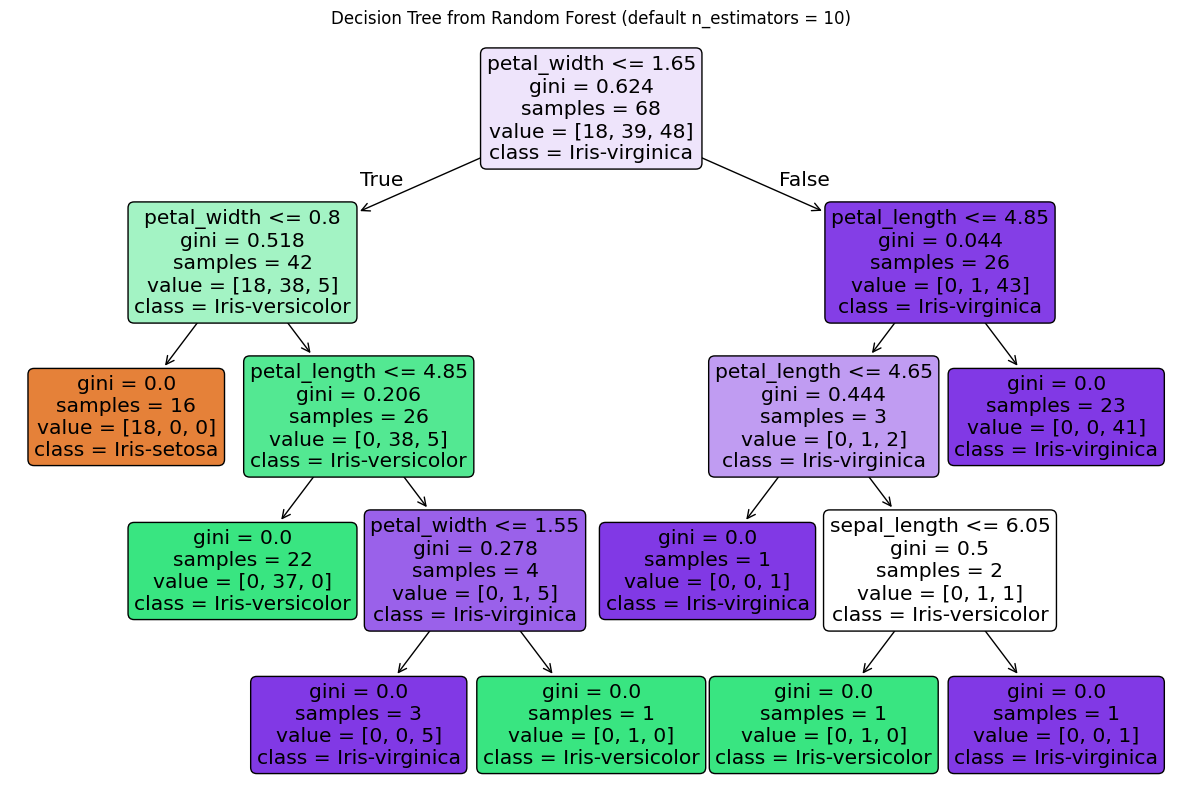

In [7]:
# Import the necessary plotting library
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Extract the first decision tree from the Random Forest
tree = rf_default.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(15,10))
plot_tree(tree, filled=True, feature_names=X.columns, class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], rounded=True)
plt.title("Decision Tree from Random Forest (default n_estimators = 10)")
plt.show()

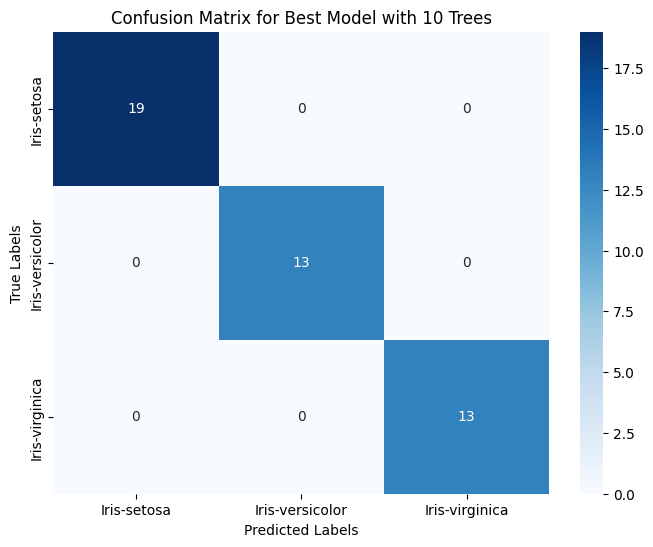

In [8]:

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Use the best Random Forest model (based on best_n_estimators) for prediction
rf_best = RandomForestClassifier(n_estimators=best_n_estimators, random_state=42)
rf_best.fit(X_train, y_train)

# Predict using the best model
y_pred_best = rf_best.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
            yticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.title(f"Confusion Matrix for Best Model with {best_n_estimators} Trees")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()